In [1]:
#Deep Learning
#Neural Networks
#Neutral Networks 
 

In [2]:
import tensorflow as tf


C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
import cv2
loc=r'preview'


In [4]:
import os  
label=[]
#os is library used to list down all the files in directory 
# used for dealing with directory
for i in os.listdir(loc):
    if i.split('_')[0]=='Moi':
        label.append(0)
    elif i.split('_')[0]=='Navn':
        label.append(1)
    if i.split('_')[0]=='Sahil':
        label.append(2)
    if i.split('_')[0]=='Hemu':
        label.append(3)
#we are separating labels

In [5]:
#features we require now
features=[]
for i in os.listdir(loc):
    f=cv2.imread(os.path.join(loc,i))
    resized_f=cv2.resize(f,(70,70))   #resizing all imgaes
    features.append(resized_f)
    
#



In [6]:
import numpy as np
X=np.array(features)/255  #normalizing the pixel values
Y=np.array(label)

In [7]:
#tensor flow is frame work 
#keras and tflearn are libraries

In [8]:
#to use keras first you have to define model
model=tf.keras.models.Sequential()

In [9]:
#Dense is used to define how many neurons will be used
#input layers
#features dim are not known:use flatten
#features din are known: put into dense as 2d array
model.add(tf.keras.layers.Flatten())



#hidden layers(2)
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))



#output layers 
model.add(tf.keras.layers.Dense(4,activation ='softmax'))


In [10]:
# in categorial entropy you have to define data in form of binary 
#whereas in case of sparse you have to not
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [13]:
model.fit(xtrain,ytrain,epochs=10)   #Trainig accuracy

Epoch 1/10
3171/3171 [==============================] - ETA: 0s - loss: 0.4280 - acc: 0.839 - 3s 808us/sample - loss: 0.4243 - acc: 0.8411
Epoch 2/10
3171/3171 [==============================] - 3s 841us/sample - loss: 0.3704 - acc: 0.8594
Epoch 3/10
3171/3171 [==============================] - 3s 886us/sample - loss: 0.3668 - acc: 0.8691
Epoch 4/10
3171/3171 [==============================] - 3s 910us/sample - loss: 0.3390 - acc: 0.8729
Epoch 5/10
3171/3171 [==============================] - 3s 935us/sample - loss: 0.3958 - acc: 0.8549
Epoch 6/10
3171/3171 [==============================] - 3s 866us/sample - loss: 0.3843 - acc: 0.8540s - loss: 0.4089 
Epoch 7/10
3171/3171 [==============================] - 3s 855us/sample - loss: 0.2708 - acc: 0.8985
Epoch 8/10
3171/3171 [==============================] - 2s 787us/sample - loss: 0.3542 - acc: 0.8770
Epoch 9/10
3171/3171 [==============================] - 3s 867us/sample - loss: 0.3095 - acc: 0.8972
Epoch 10/10
3171/3171 [=============

In [14]:
model.save('harshu')

In [15]:
from keras.model import load_model
new_model=load_model('harshu')

Using TensorFlow backend.


ModuleNotFoundError: No module named 'keras.model'

In [14]:
lc=r'Predict'

pred=[]
for i in os.listdir(lc):
    p=cv2.imread(os.path.join(lc,i))
    resized_p=cv2.resize(p,(70,70))   #resizing all imgaes
    pred.append(resized_p)
    


pred=np.array(pred)/255

In [15]:

model.predict(pred[0].reshape(1,70,70,3))#these are probabity oneuron


array([[1.4269250e-02, 7.3935198e-12, 9.8573065e-01, 1.0284563e-07]],
      dtype=float32)

In [16]:
np.argmax(model.predict(pred[0].reshape(1,70,70,3)))

2

In [17]:
  #real output 

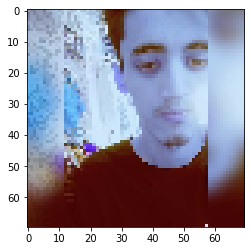

In [18]:
import matplotlib.pyplot as plt
plt.imshow(pred[0])

In [19]:
pl=[]
for i in model.predict(xtest):
    
    pl.append(np.argmax(i))

In [20]:
(pl==ytest).sum()/len(xtest)     # no overfitting here like previous

0.8533585619678334

Using TensorFlow backend.
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

ValueError: Unknown initializer: GlorotUniform